In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6,8.0,NaN,1.0,NaN,4.0,NaN,NaN,1
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2,NaN,1.0,NaN,NaN,1.0,3.0,NaN,1
680,5,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	48
float64		column 3	114
float64		column 4	64
float64		column 5	98
float64		column 6	64
float64		column 7	98
float64		column 8	98
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,635.000000,569.000000,619.000000,585.000000,619.000000,585.000000,585.000000,683.000000
mean,4.442167,3.119685,3.123023,2.806139,3.182906,3.508885,3.382906,2.815385,1.603221
std,2.820761,3.062674,2.946527,2.834923,2.200338,3.613777,2.381517,3.041399,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

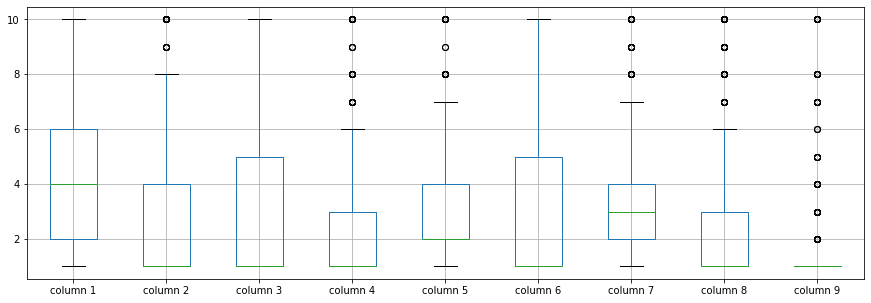

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.119685
column 3    3.123023
column 4    2.806139
column 5    3.182906
column 6    3.508885
column 7    3.382906
column 8    2.815385
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.640719,0.664777,0.488553,0.527185,0.586686,0.553390,0.534254,0.350957
column 2,0.640719,1.000000,0.918069,0.694624,0.749306,0.674452,0.745664,0.731104,0.467008
column 3,0.664777,0.918069,1.000000,0.678195,0.741038,0.685307,0.728450,0.709882,0.442517
column 4,0.488553,0.694624,0.678195,1.000000,0.586488,0.636000,0.639564,0.593228,0.405233
column 5,0.527185,0.749306,0.741038,0.586488,1.000000,0.574045,0.600371,0.651714,0.453774
column 6,0.586686,0.674452,0.685307,0.636000,0.574045,1.000000,0.644507,0.545945,0.329437
column 7,0.553390,0.745664,0.728450,0.639564,0.600371,0.644507,1.000000,0.640899,0.296780
column 8,0.534254,0.731104,0.709882,0.593228,0.651714,0.545945,0.640899,1.000000,0.448021
column 9,0.350957,0.467008,0.442517,0.405233,0.453774,0.329437,0.296780,0.448021,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+40,9+40+40,9+40+40,9+40+40+40+40,9+40+40+40,9+40+40,9+40,9], vae_layer = False, seed = 400)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 32.87532851809547
Epoch: 1 , loss: 32.96443185352144
Epoch: 2 , loss: 32.88432820638021
Epoch: 3 , loss: 32.735568364461265
Epoch: 4 , loss: 32.324928283691406
Epoch: 5 , loss: 31.986292521158855
Epoch: 6 , loss: 30.03401211329869
Epoch: 7 , loss: 28.796545936947776
Epoch: 8 , loss: 28.263401167733328
Epoch: 9 , loss: 27.56595157441639
Epoch: 10 , loss: 26.961472011747816
Epoch: 11 , loss: 26.467659041995095
Epoch: 12 , loss: 26.320191156296502
Epoch: 13 , loss: 25.554948511577788
Epoch: 14 , loss: 25.31272738320487
Epoch: 15 , loss: 24.750927357446578
Epoch: 16 , loss: 24.510993548801967
Epoch: 17 , loss: 24.225812185378302
Epoch: 18 , loss: 23.931560766129266
Epoch: 19 , loss: 23.244545119149343
Epoch: 20 , loss: 23.348540623982746
Epoch: 21 , loss: 23.45833038148426
Epoch: 22 , loss: 23.101527259463357
Epoch: 23 , loss: 23.268151828220912
Epoch: 24 , loss: 22.37491008213588
Epoch: 25 , loss: 22.82517

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
1,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
2,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
3,0,0.000000,-6.724507,0.000000,-1.716603,0.0,-1.657012,-5.835452,0
4,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
679,0,-0.649787,0.000000,-0.670954,-1.616918,0.0,0.000000,-0.681987,0
680,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
681,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(77.5234222804446, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.23118670863863258

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.000000,1.000000,1.000000,2.000000,1.0,3.000000,1.000000,1
1,5,4.000000,4.000000,5.000000,7.000000,10.0,3.000000,2.000000,1
2,3,1.000000,1.000000,1.000000,2.000000,2.0,3.000000,1.000000,1
3,6,8.000000,1.275493,1.000000,1.283397,4.0,1.342988,1.164548,1
4,4,1.000000,1.000000,3.000000,2.000000,1.0,3.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3,1.000000,1.000000,1.000000,2.000000,1.0,2.000000,1.000000,1
679,2,0.350213,1.000000,0.329046,0.383082,1.0,3.000000,0.318013,1
680,5,10.000000,10.000000,10.000000,4.000000,10.0,5.000000,6.000000,3
681,1,1.000000,1.000000,3.000000,2.000000,1.0,1.000000,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AL_10(imp).xlsx", index=False, header=False)